In [1]:
# ─────────────────────────────────────────────
# 1 : Librairies
# ─────────────────────────────────────────────

# Classic
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import polars as pl

# Probabilities
from scipy.optimize import curve_fit
from nucleo.simulation.probabilities import proba_gamma

popt [mu, theta, A]: [37.89810256 17.99604862  0.92443102]


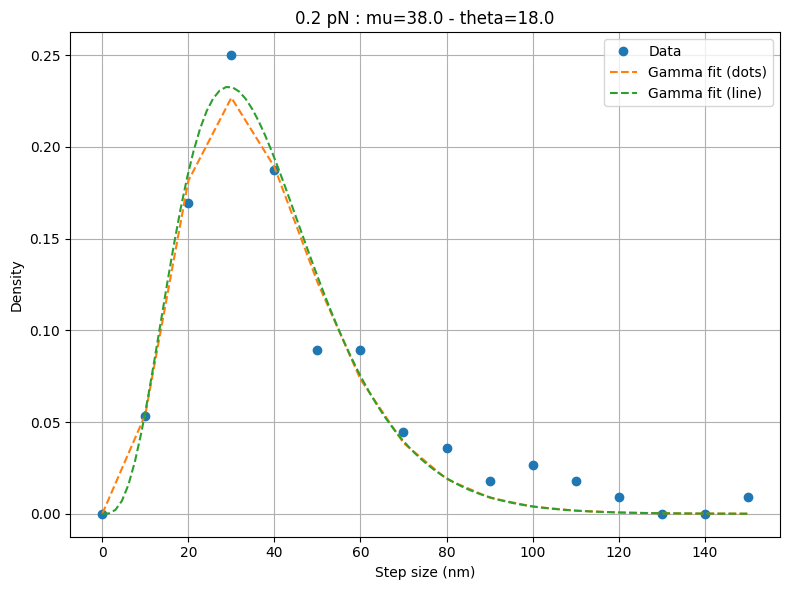


 mu_ryu_bp = 182.0 
 theta_ryu_bp = 91.0

 mu_nm = 60 
 theta_nm = 30


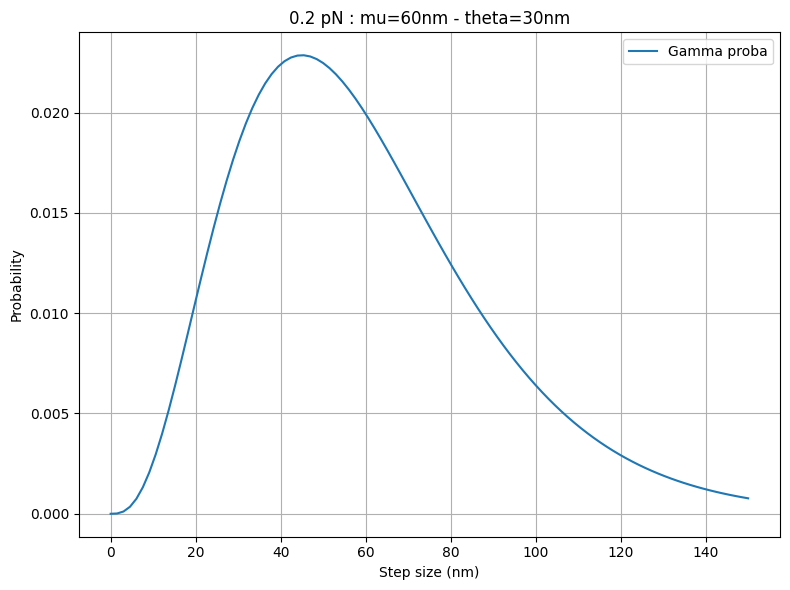

l (entier) : [450 332 261 213 178 152 131 115 101  90  81  72  65  59  54  49  44  40
  37  34  31  28  25  23  21  19  17  15  14  12  11   9   8   7   6   5
   4   3   2   1]
d après arrondi l : [0.00206186 0.0027248  0.00337838 0.00403226 0.00469484 0.00534759
 0.0060241  0.00666667 0.00735294 0.008      0.00862069 0.00934579
 0.01       0.0106383  0.01123596 0.01190476 0.01265823 0.01333333
 0.01388889 0.01449275 0.01515152 0.01587302 0.01666667 0.01724138
 0.01785714 0.01851852 0.01923077 0.02       0.02040816 0.0212766
 0.02173913 0.02272727 0.02325581 0.02380952 0.02439024 0.025
 0.02564103 0.02631579 0.02702703 0.02777778]


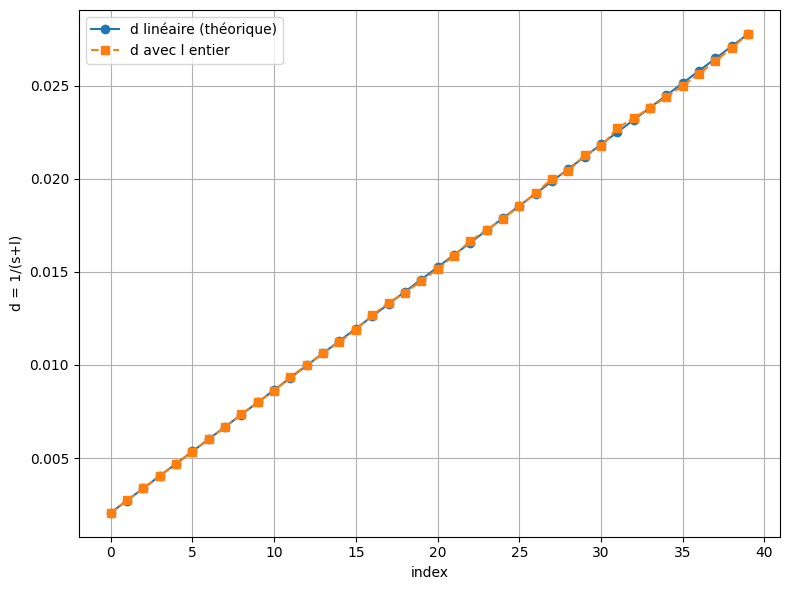

In [2]:
# ─────────────────────────────────────────────
# 2.1 : Ryu Datas
# ─────────────────────────────────────────────

# Datas
data = np.array([1, 0, 0, 1, 2, 3, 2, 4, 5, 10, 10, 21, 28, 19, 6, 0])
y_data = data[::-1] / np.sum(data)
x_data = np.arange(0, 150 + 1, 10).astype(float)
x_safe = x_data.copy()
x_safe[0] = 1e-6

# Filtering
def proba_gamma_fit_counts(x, mu, theta, A):
    y = proba_gamma(mu, theta, x)
    y = np.where(np.isfinite(y), y, 0.0)
    return A * y

# First guesses
A0 = float(y_data.sum())
mu0, theta0 = 30.0, 20.0

# Fitting
popt, pcov = curve_fit(
    proba_gamma_fit_counts,
    x_safe,
    y_data,
    p0=[mu0, theta0, A0],
    bounds=([1e-6, 1e-6, 1e-6], [np.inf, np.inf, np.inf]),
)
print("popt [mu, theta, A]:", popt)

# Fine curve
x_step = 100
x_fine = np.linspace(x_data.min(), x_data.max(), x_step)
y_fine = proba_gamma(popt[0], popt[1], x_fine)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'o', label="Data")
plt.plot(x_data, proba_gamma_fit_counts(x_safe, *popt), '--', label="Gamma fit (dots)")
plt.plot(x_fine, y_fine*x_step/len(x_data), '--', label="Gamma fit (line)")
plt.title(f"0.2 pN : mu={np.round(popt[0])} - theta={np.round(popt[1])}")
plt.xlabel("Step size (nm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────
# 2.2 : Conversions
# ─────────────────────────────────────────────

# From nm_in_ryu to bp_in_ryu
mu_ryu_nm = 40     # nm Ryu
theta_ryu_nm = 20  # nm Ryu
ryu_nm_per_bp = 0.220
mu_ryu_bp = mu_ryu_nm / ryu_nm_per_bp
theta_ryu_bp = theta_ryu_nm / ryu_nm_per_bp
print(f"\n mu_ryu_bp = {np.round(mu_ryu_bp)} \n theta_ryu_bp = {np.round(theta_ryu_bp)}")

# From bp_in_ryu to nm
bp_per_nm = 3
mu_nm = int(mu_ryu_bp / bp_per_nm)
theta_nm = int(theta_ryu_bp / bp_per_nm)
print(f"\n mu_nm = {np.round(mu_nm)} \n theta_nm = {np.round(theta_nm)}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_fine, proba_gamma(mu_nm, theta_nm, x_fine), '-', label="Gamma proba")
plt.title(f"0.2 pN : mu={mu_nm}nm - theta={theta_nm}nm")
plt.xlabel("Step size (nm)")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────
# 2.3 : Linker size Generation 
# ─────────────────────────────────────────────

# Values
s = 35
N = 40
lmin, lmax = 1, 450  # bornes souhaitées pour l (entières)
d = np.linspace(1/(s+lmax), 1/(s+lmin), N)
l = 1/d - s
l_int = np.rint(l).astype(int)  # arrondi au plus proche
d_int = 1/(s + l_int)           # d correspondant après arrondi

# Prints
# print("d linéaire :", d)
# print("l (float)  :", l)
print("l (entier) :", l_int)
print("d après arrondi l :", d_int)

# Plot
plt.figure(figsize=(8,6))
plt.plot(d, 'o-', label="d linéaire (théorique)")
plt.plot(d_int, 's--', label="d avec l entier")
plt.xlabel("index")
plt.ylabel("d = 1/(s+l)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

popt [mu, theta, A]: [37.89810256 17.99604862  0.92443102]


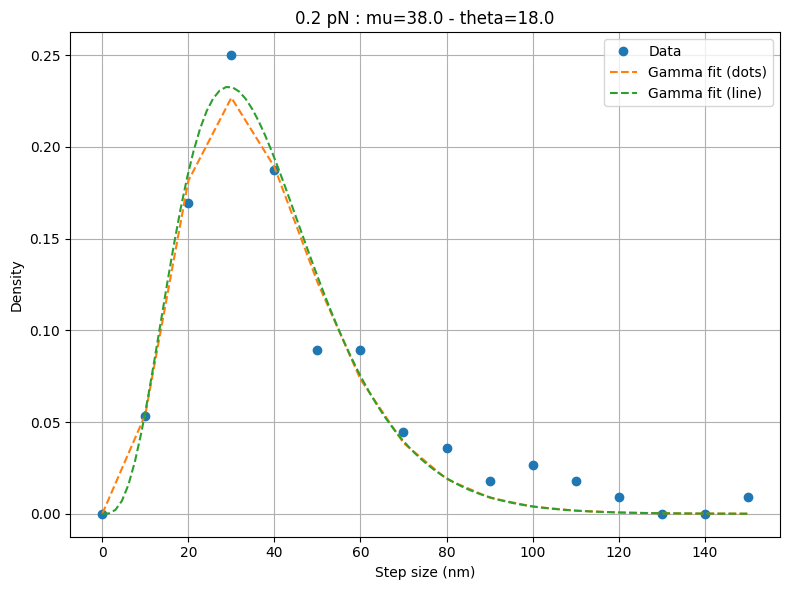


 mu_ryu_bp = 182.0 
 theta_ryu_bp = 91.0

 mu_nm = 60 
 theta_nm = 30


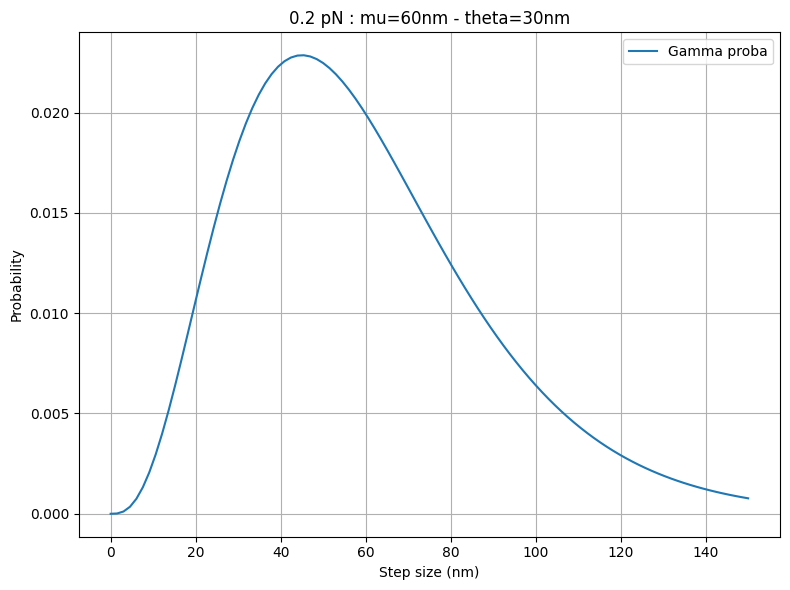

l (entier) : [450 332 261 213 178 152 131 115 101  90  81  72  65  59  54  49  44  40
  37  34  31  28  25  23  21  19  17  15  14  12  11   9   8   7   6   5
   4   3   2   1]
d après arrondi l : [0.00206186 0.0027248  0.00337838 0.00403226 0.00469484 0.00534759
 0.0060241  0.00666667 0.00735294 0.008      0.00862069 0.00934579
 0.01       0.0106383  0.01123596 0.01190476 0.01265823 0.01333333
 0.01388889 0.01449275 0.01515152 0.01587302 0.01666667 0.01724138
 0.01785714 0.01851852 0.01923077 0.02       0.02040816 0.0212766
 0.02173913 0.02272727 0.02325581 0.02380952 0.02439024 0.025
 0.02564103 0.02631579 0.02702703 0.02777778]


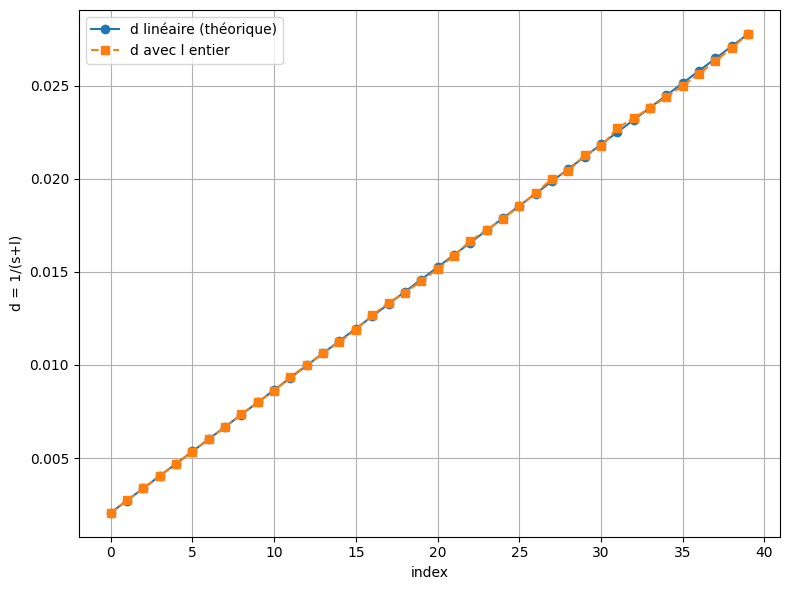

In [3]:
, 2, 3, 2, 4, 5, 10, 10, 21, 28, 19, 6, 0])
y_data = data[::-1] / np.sum(data)
x_data = np.arange(0, 150 + 1, 10).astype(float)
x_safe = x_data.copy()
x_safe[0] = 1e-6

# Filtering
def proba_gamma_fit_counts(x, mu, theta, A):
    y = proba_gamma(mu, theta, x)
    y = np.where(np.isfinite(y), y, 0.0)
    return A * y

# First guesses
A0 = float(y_data.sum())
mu0, theta0 = 30.0, 20.0

# Fitting
popt, pcov = curve_fit(
    proba_gamma_fit_counts,
    x_safe,
    y_data,
    p0=[mu0, theta0, A0],
    bounds=([1e-6, 1e-6, 1e-6], [np.inf, np.inf, np.inf]),
)
print("popt [mu, theta, A]:", popt)

# Fine curve
x_step = 100
x_fine = np.linspace(x_data.min(), x_data.max(), x_step)
y_fine = proba_gamma(popt[0], popt[1], x_fine)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'o', label="Data")
plt.plot(x_data, proba_gamma_fit_counts(x_safe, *popt), '--', label="Gamma fit (dots)")
plt.plot(x_fine, y_fine*x_step/len(x_data), '--', label="Gamma fit (line)")
plt.title(f"0.2 pN : mu={np.round(popt[0])} - theta={np.round(popt[1])}")
plt.xlabel("Step size (nm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────
# 2.2 : Conversions
# ─────────────────────────────────────────────

# From nm_in_ryu to bp_in_ryu
mu_ryu_nm = 40     # nm Ryu
theta_ryu_nm = 20  # nm Ryu
ryu_nm_per_bp = 0.220
mu_ryu_bp = mu_ryu_nm / ryu_nm_per_bp
theta_ryu_bp = theta_ryu_nm / ryu_nm_per_bp
print(f"\n mu_ryu_bp = {np.round(mu_ryu_bp)} \n theta_ryu_bp = {np.round(theta_ryu_bp)}")

# From bp_in_ryu to nm
bp_per_nm = 3
mu_nm = int(mu_ryu_bp / bp_per_nm)
theta_nm = int(theta_ryu_bp / bp_per_nm)
print(f"\n mu_nm = {np.round(mu_nm)} \n theta_nm = {np.round(theta_nm)}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_fine, proba_gamma(mu_nm, theta_nm, x_fine), '-', label="Gamma proba")
plt.title(f"0.2 pN : mu={mu_nm}nm - theta={theta_nm}nm")
plt.xlabel("Step size (nm)")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────
# 2.3 : Linker size Generation 
# ─────────────────────────────────────────────

# Values
s = 35
N = 40
lmin, lmax = 1, 450  # bornes souhaitées pour l (entières)
d = np.linspace(1/(s+lmax), 1/(s+lmin), N)
l = 1/d - s
l_int = np.rint(l).astype(int)  # arrondi au plus proche
d_int = 1/(s + l_int)           # d correspondant après arrondi

# Prints
# print("d linéaire :", d)
# print("l (float)  :", l)
print("l (entier) :", l_int)
print("d après arrondi l :", d_int)

# Plot
plt.figure(figsize=(8,6))
plt.plot(d, 'o-', label="d linéaire (théorique)")
plt.plot(d_int, 's--', label="d avec l entier")
plt.xlabel("index")
plt.ylabel("d = 1/(s+l)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# .